In [1]:
%load_ext autoreload
%autoreload 2

import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

sns.set_style('whitegrid')

sys.path.append("../")
from utility.ar1 import AR1
from utility.hmm1 import HMM1
from utility.ar import AR

### Some example of HMM

In [ ]:
np.random.seed(123)

# signal to noise ratio = 0.5 = s/(s + w)
phi = 0.75
s = 1
w = 1

<AxesSubplot: >

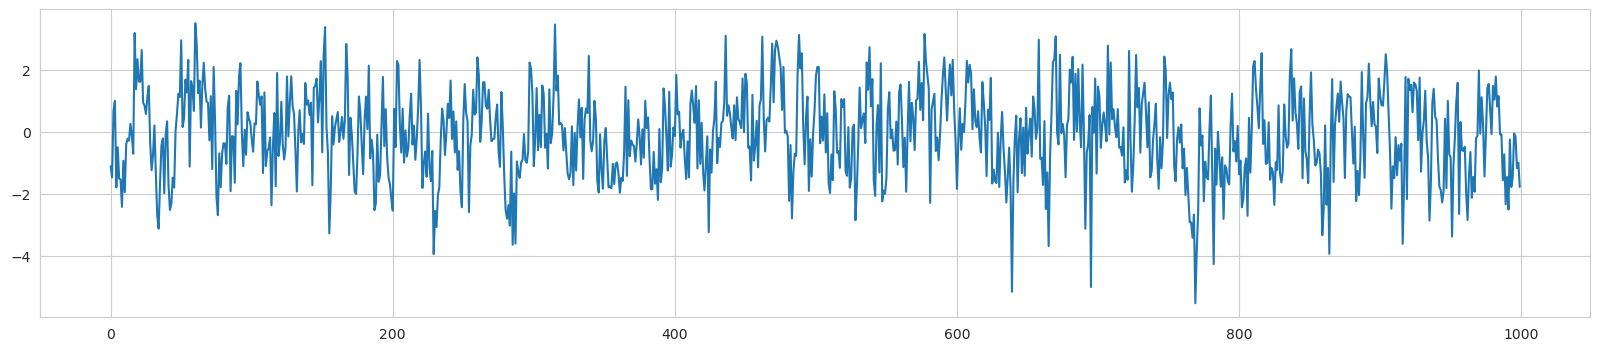

In [11]:
hmm = HMM1(phi, s*(1-phi**2), w)
hmm.simulate(0, 1000).plot(figsize=(20,4))

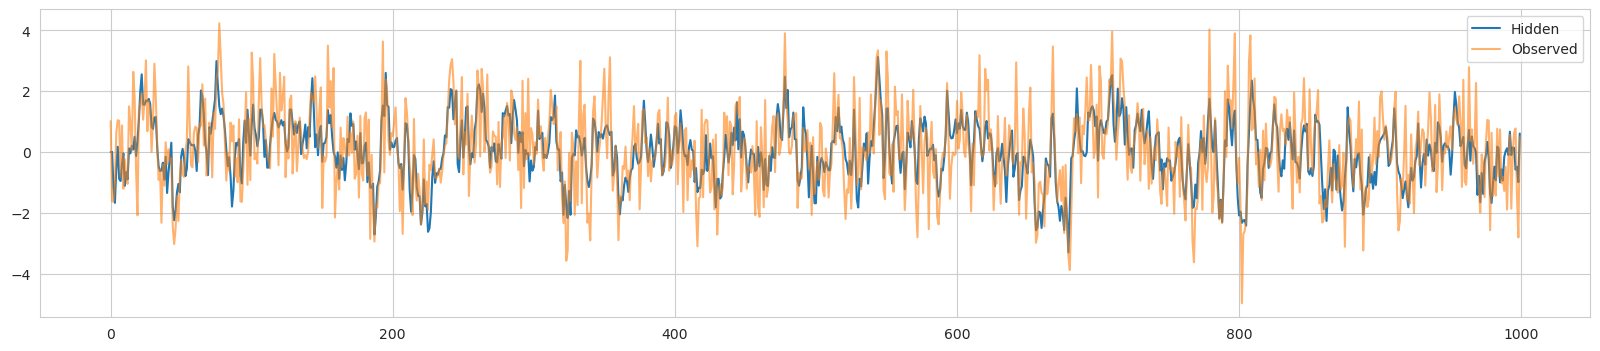

In [12]:
ar = AR1(phi, var=s*(1-phi**2))
xs = ar.simulate(0, 1000)
es = np.random.normal(loc=0, scale=np.sqrt(w), size=xs.shape)

ax = xs.plot(figsize=(20, 4), label='Hidden')
ax.plot(xs + es, alpha=0.6, label='Observed')
ax.legend()
plt.show()

### Stochastic Volatility Model

In [63]:
# signal to noise ratio = 0.5 = s/(s + w)
phi = 0.6
s = 1
mu = 0

ar = AR1(phi, var=s*(1-phi**2))
xs = ar.simulate(x0=0, length=1000)
vols = np.exp(mu + xs)
ys = np.random.normal(loc=0, scale=np.sqrt(vols))

<AxesSubplot: >

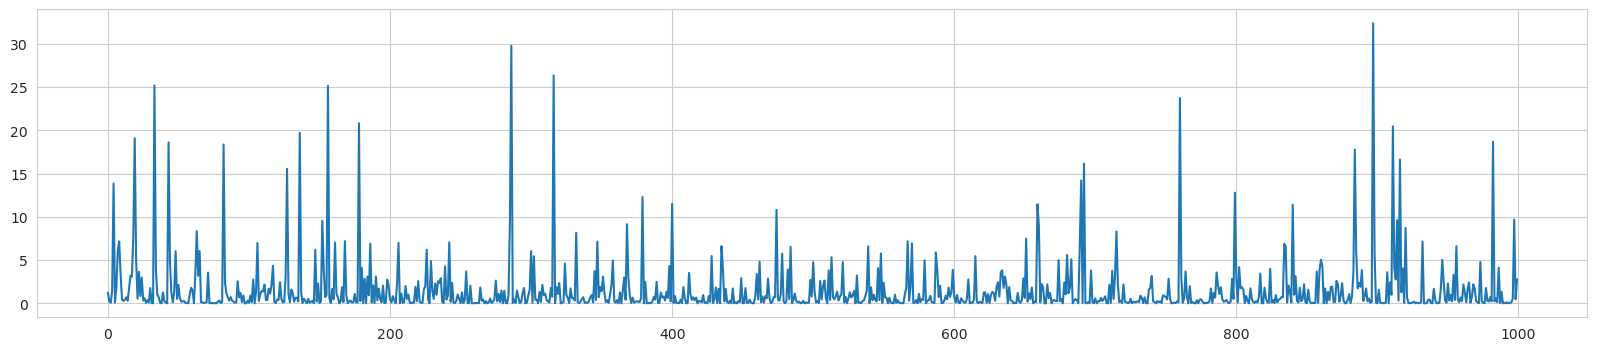

In [64]:
pd.Series(ys**2).plot(figsize=(20, 4))